<h1 style="font-size:36px;">Data exploration of synthetic data generated from INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of "operations_Gretel_tabular_lstm.csv"  which is essentailly a synthetic version of original "operations.csv" from INSPIRE is shown</h2>

link to gretel.ai: https://console.gretel.ai/proj_2Z7R2lTw5P0JagOUtSy9W3nVy5S/models/656ef7aeac3ffb4c83838dad/data

link to INSPIRE dataset: https://physionet.org/content/inspire/0.1/

A full list of the ICD-10-CM codes and the description can be found on the Centers for Disease Control and Prevention (CDC) website 
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/April-1-2023-Update/icd10cm-code%20descriptions-%20April%201%202023.zip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels

print("Libraries Imported")

Libraries Imported


In [2]:
df_sgd_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\Gretel_INSPIRE_operations\\gretel-tabular-lstm.csv')

In [3]:
df_operations = df_sgd_operations_original.copy()

In [4]:
df_operations.head()

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,492758101,134244643,227878923,NaN,2880.0,75,M,68.0,162.0,Asian,...,4005.0,0,10075.0,3860.0,4005.0,NaN,NaN,NaN,NaN,NaN
1,403169137,143682322,252431967,NaN,1440.0,65,F,54.0,153.0,Asian,...,2325.0,0,4315.0,2240.0,2335.0,NaN,NaN,NaN,NaN,NaN
2,466199524,128959270,253814739,NaN,0.0,45,M,74.0,171.0,Asian,...,660.0,0,1435.0,640.0,660.0,NaN,NaN,NaN,NaN,NaN
3,414485565,138314564,229111342,NaN,1440.0,55,M,77.0,164.0,Asian,...,2060.0,0,8635.0,1915.0,2070.0,NaN,NaN,NaN,NaN,NaN
4,494648487,164036054,264927286,NaN,2880.0,40,F,58.0,162.0,Asian,...,3855.0,0,11515.0,3840.0,3860.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_operations.head(30)

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
0,492758101,134244643,227878923,NaN,2880.0,75,M,68.0,162.0,Asian,...,4005.0,0,10075.0,3860.0,4005.0,NaN,NaN,NaN,NaN,NaN
1,403169137,143682322,252431967,NaN,1440.0,65,F,54.0,153.0,Asian,...,2325.0,0,4315.0,2240.0,2335.0,NaN,NaN,NaN,NaN,NaN
2,466199524,128959270,253814739,NaN,0.0,45,M,74.0,171.0,Asian,...,660.0,0,1435.0,640.0,660.0,NaN,NaN,NaN,NaN,NaN
3,414485565,138314564,229111342,NaN,1440.0,55,M,77.0,164.0,Asian,...,2060.0,0,8635.0,1915.0,2070.0,NaN,NaN,NaN,NaN,NaN
4,494648487,164036054,264927286,NaN,2880.0,40,F,58.0,162.0,Asian,...,3855.0,0,11515.0,3840.0,3860.0,NaN,NaN,NaN,NaN,NaN
5,482324420,135070272,229635081,NaN,1440.0,60,M,NaN,174.0,Asian,...,1985.0,0,2875.0,1955.0,1995.0,NaN,NaN,NaN,NaN,NaN
6,477725170,134478601,296365821,NaN,1440.0,75,M,51.0,158.0,Asian,...,2210.0,0,14395.0,1920.0,2215.0,NaN,NaN,NaN,NaN,NaN
7,410091278,197719697,254474813,NaN,1440.0,60,F,65.0,163.0,Asian,...,2315.0,0,8635.0,2210.0,2325.0,NaN,NaN,NaN,NaN,NaN
8,435613982,130922710,274824097,NaN,0.0,65,F,71.0,161.0,Asian,...,585.0,0,7195.0,480.0,580.0,NaN,NaN,NaN,NaN,NaN
9,426294358,179617042,264571024,NaN,1440.0,65,M,71.0,171.0,Asian,...,2100.0,0,14395.0,1925.0,2095.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   op_id              5000 non-null   int64  
 1   subject_id         5000 non-null   int64  
 2   hadm_id            5000 non-null   int64  
 3   case_id            748 non-null    float64
 4   opdate             4999 non-null   float64
 5   age                5000 non-null   int64  
 6   sex                5000 non-null   object 
 7   weight             4966 non-null   float64
 8   height             4979 non-null   float64
 9   race               5000 non-null   object 
 10  asa                4891 non-null   float64
 11  emop               5000 non-null   int64  
 12  department         5000 non-null   object 
 13  antype             5000 non-null   object 
 14  icd10_pcs          5000 non-null   object 
 15  orin_time          5000 non-null   int64  
 16  orout_time         4999 

In [7]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time'],
      dtype='object')

In [8]:
df_operations.describe()

,op_id,subject_id,hadm_id,case_id,opdate,age,weight,height,asa,emop,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
count,5.000000e+03,5.000000e+03,5.000000e+03,748.000000,4.999000e+03,5000.00000,4966.000000,4979.000000,4891.000000,5000.000000,...,5.000000e+03,5.000000e+03,4.999000e+03,5.000000e+03,4.998000e+03,4.400000e+01,4.400000e+01,4.250000e+02,4.250000e+02,9.000000e+00
mean,4.503328e+08,1.509382e+08,2.500442e+08,2014.183155,1.447487e+05,55.93260,62.529400,161.821852,1.761603,0.084400,...,1.451464e+05,1.429478e+05,1.562155e+05,1.499910e+05,1.514323e+05,1.038948e+05,1.047791e+05,1.011269e+05,1.028264e+05,6.741494e+05
std,2.905982e+07,2.825163e+07,2.881928e+07,19959.620743,5.197226e+05,15.52591,11.502872,8.822510,0.638574,0.278015,...,5.127296e+05,5.209345e+05,5.309183e+05,5.336791e+05,5.311105e+05,3.602823e+05,3.639650e+05,3.550778e+05,3.511428e+05,6.955914e+05
min,4.000399e+08,1.000378e+08,2.000285e+08,-32112.000000,0.000000e+00,20.00000,1.000000,50.000000,1.000000,0.000000,...,1.350000e+02,0.000000e+00,1.435000e+03,6.500000e+01,2.300000e+02,2.035000e+03,2.195000e+03,1.400000e+01,1.300000e+03,5.055500e+04
25%,4.250842e+08,1.270841e+08,2.253140e+08,-18973.250000,1.440000e+03,45.00000,54.000000,155.000000,1.000000,0.000000,...,2.185000e+03,0.000000e+00,5.755000e+03,2.060000e+03,2.190000e+03,4.276250e+03,4.268750e+03,2.560000e+03,4.935000e+03,1.675900e+05
50%,4.507401e+08,1.520086e+08,2.494477e+08,6313.500000,1.440000e+03,60.00000,61.000000,161.000000,2.000000,0.000000,...,2.777500e+03,0.000000e+00,1.007500e+04,2.647500e+03,2.785000e+03,6.597500e+03,6.840000e+03,3.920000e+03,6.585000e+03,2.463750e+05
75%,4.759800e+08,1.746403e+08,2.755383e+08,18766.750000,4.320000e+03,70.00000,70.000000,168.000000,2.000000,0.000000,...,5.580000e+03,0.000000e+00,2.159500e+04,5.427500e+03,5.548750e+03,1.085750e+04,1.080125e+04,8.410000e+03,1.273000e+04,1.112655e+06
max,4.999609e+08,1.999934e+08,2.999760e+08,32699.000000,4.948320e+06,90.00000,165.000000,194.000000,6.000000,1.000000,...,4.772835e+06,4.998240e+06,4.950715e+06,4.998950e+06,4.823000e+06,1.704895e+06,1.736050e+06,2.978690e+06,2.978740e+06,1.894785e+06


Op id

Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively).

In [9]:
unique_subject_ids = df_operations['op_id'].nunique()
print(unique_subject_ids)

5000


In [10]:
unique_icd10_pcs_values = df_operations['op_id'].unique()
print(unique_icd10_pcs_values[:30])

[492758101 403169137 466199524 414485565 494648487 482324420 477725170
 410091278 435613982 426294358 441541397 461170559 485134946 452948164
 458356292 437959996 499776668 458288381 489229845 438142714 431387177
 460312223 481240536 414686230 482169648 427469408 451454181 452693584
 461395205 491765507]


Subject id

Each table can be connected using subject_id. A subject_id may be matched to one or more hadm_ids. A single hadm_id may be matched with one or more op_ids. 
We did not extract these variables except for the medical record number, which was subsequently substituted with unique random integers as the subject id (described as subject_id). Each admission and operation were randomly assigned with unique numbers (hadm_id and op_id, respectively). To allow identifiers to be easily distinguished, subject_id begin with “1”, hadm_id begin with “2”, and and op_id, respectively begin with “4”.

In [11]:
unique_subject_ids = df_operations['subject_id'].nunique()
print(unique_subject_ids)

4998


In [12]:
unique_subject_id = df_operations['subject_id'].unique()
print(unique_subject_id[:30])

[134244643 143682322 128959270 138314564 164036054 135070272 134478601
 197719697 130922710 179617042 195584164 189569094 139339711 114781894
 190742754 123888030 174297334 147929790 156349302 114842334 189208490
 150282051 184414591 113848937 153293882 106125331 161883474 130425874
 107183003 145034754]


In [13]:
top_10_subject_id = df_operations['subject_id'].value_counts().head(30)
print(top_10_subject_id)

subject_id
110040240    2
190742754    2
134244643    1
179425943    1
128776228    1
178940853    1
149684624    1
133038430    1
192700941    1
108164874    1
150001781    1
196319380    1
163813871    1
100808430    1
196004039    1
150750641    1
162438021    1
120133703    1
194146024    1
195351287    1
193419397    1
172920441    1
164132802    1
116654670    1
175921143    1
136936630    1
129720910    1
118737380    1
186627778    1
199993363    1
Name: count, dtype: int64


Hadm_id

In [14]:
unique_hadm_id = df_operations['hadm_id'].nunique()
print(unique_hadm_id)

4997


In [15]:
unique_hadm_id = df_operations['hadm_id'].unique()
print(unique_hadm_id[:30])

[227878923 252431967 253814739 229111342 264927286 229635081 296365821
 254474813 274824097 264571024 228241013 258428295 261220363 252841189
 295483964 281623204 249859685 286085204 262119852 247843454 245622419
 233648230 238745979 203302130 257134234 258993433 230524508 288337401
 232223592 212305113]


In [16]:
top_10_hadm_id = df_operations['hadm_id'].value_counts().head(30)
print(top_10_hadm_id)

hadm_id
209181966    2
295483964    2
246137863    2
227878923    1
284213981    1
275318618    1
235032079    1
220471885    1
270483846    1
284215760    1
237442430    1
208375669    1
200266054    1
233651846    1
238754015    1
244247873    1
234300547    1
271471317    1
255069068    1
219600313    1
252203423    1
249294013    1
262549285    1
283087991    1
209543158    1
242081280    1
239652213    1
261414690    1
272586743    1
298928122    1
Name: count, dtype: int64


ICS-10-PCS

 Operation names were converted to the first four codes of ICD-10-PCS

In [17]:
unique_subject_ids = df_operations['icd10_pcs'].nunique()
print(unique_subject_ids)

532


In [18]:
unique_icd10_pcs_values = df_operations['icd10_pcs'].unique()
print(unique_icd10_pcs_values[:30])

['08RJ3' '0D160' '08DJ3' '08Q1X' '08BSX' '08R43' '08RK3' '0FT10' '0BBF4'
 '0TY00' '0DTP0' '09B00' '0XP6X' '0HBT0' '0GTK0' '0CQ80' '0HBU0' '0TBB4'
 '09Q70' '0RG00' '0FB04' '08D43' '0UT04' '0SBD0' '02QA0' '0TT00' '0BTC4'
 '0VB08' '009T0' '0FT44']


In [19]:
top_10_icd10_pcs = df_operations['icd10_pcs'].value_counts().head(30)
print(top_10_icd10_pcs)


icd10_pcs
08DJ3    219
09Q70    163
0HBT0    145
0GTK0    138
08R43    132
0HBU0    129
0FT44    104
0DB64    104
08RJ3     81
0RG00     79
0TBB8     78
0TBB7     74
10D00     70
08RK3     70
09B00     68
0DTP0     67
0WQN0     57
0WJG0     56
0UJD8     56
0VB08     56
0UT94     49
0HD0X     48
0HQ0X     46
0VT00     45
0D160     45
00B00     44
0YQ50     42
0DB60     40
0SRA0     40
0PB00     40
Name: count, dtype: int64


C:\Users\20181588\AppData\Local\Temp\ipykernel_3108\2299865560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")


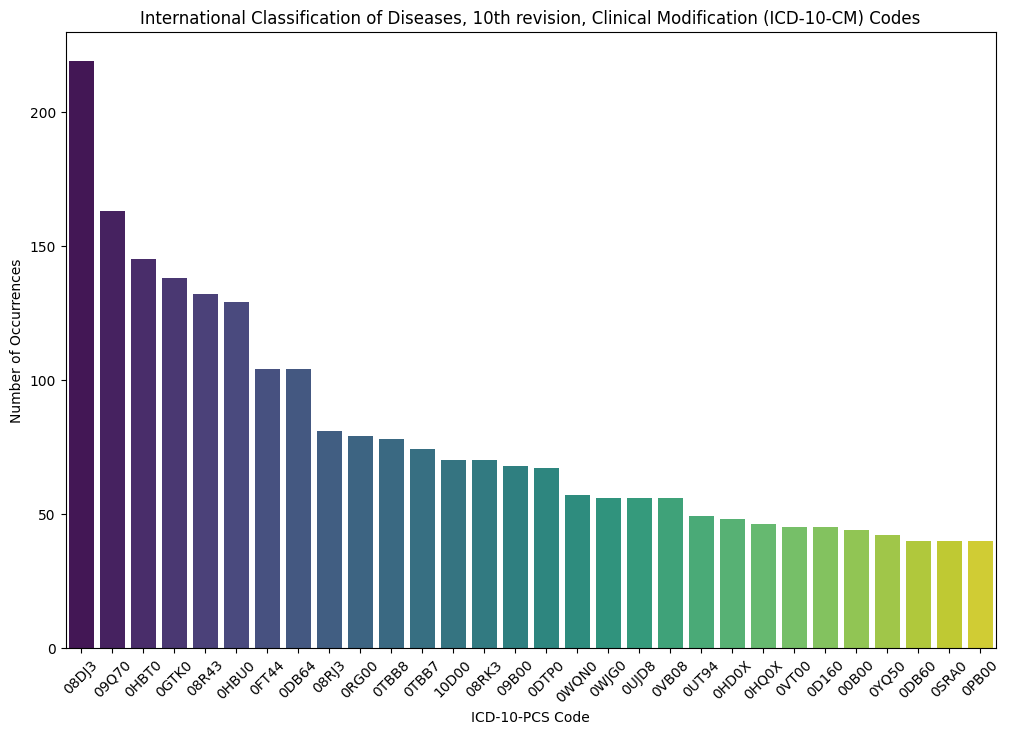

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_pcs.index, y=top_10_icd10_pcs.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-PCS Code")
plt.show()

Department

In [21]:
unique_department = df_operations['department'].nunique()
print(unique_department)

12


In [22]:
unique_department = df_operations['department'].unique()
print(unique_department[:16])

['OT' 'GS' 'CTS' 'OS' 'OL' 'OG' 'UR' 'NS' 'PS' 'RAD' 'AN' 'IM']


In [23]:
top_10_department  = df_operations['department'].value_counts().head(16)
print(top_10_department )

department
GS     1432
OS      686
OT      599
UR      524
OG      464
OL      408
NS      372
CTS     285
PS      221
RAD       5
AN        3
IM        1
Name: count, dtype: int64


OG: Obstetrics and Gynecology
GS: General Surgery
OS: Orthopedic Surgery
OT: Occupational Therapy (though in a department context, this might mean something else)
CTS: Cardiothoracic Surgery
UR: Urology
OL: Otolaryngology (Ear, Nose, and Throat or ENT)
NS: Neurosurgery or Neurological Surgery
PS: Plastic Surgery
EM: Emergency Medicine
AN: Anesthesiology
RO: Radiation Oncology
IM: Internal Medicine
PED: Pediatrics
DM:  Dhermathology
RAD: Radiology

Anaesthesia type

In [24]:
unique_antype = df_operations['antype'].nunique()
print(unique_antype)

4


In [25]:
unique_antype = df_operations['antype'].unique()
print(unique_antype[:4])

['MAC' 'General' 'Neuraxial' 'Regional']


In [26]:
top_10_antype= df_operations['antype'].value_counts().head(4)
print(top_10_antype)

antype
General      3878
MAC           580
Neuraxial     540
Regional        2
Name: count, dtype: int64


Duration of stay time is dischage time (all tines are shown in minutes)

In [27]:
print(df_operations['admission_time'] [:15])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: admission_time, dtype: int64


In [28]:
print(df_operations['discharge_time'] [:15])

0     10075.0
1      4315.0
2      1435.0
3      8635.0
4     11515.0
5      2875.0
6     14395.0
7      8635.0
8      7195.0
9     14395.0
10    10075.0
11     4315.0
12    21595.0
13     8635.0
14    23035.0
Name: discharge_time, dtype: float64


Duration of anesthesia

In [29]:
print(df_operations['anstart_time'] [:15])

0     3860.0
1     2240.0
2      640.0
3     1915.0
4     3840.0
5     1955.0
6     1920.0
7     2210.0
8      480.0
9     1925.0
10    3570.0
11    2145.0
12    3360.0
13    4795.0
14    3440.0
Name: anstart_time, dtype: float64


In [30]:
print(df_operations['anend_time'] [:15])

0     4005.0
1     2335.0
2      660.0
3     2070.0
4     3860.0
5     1995.0
6     2215.0
7     2325.0
8      580.0
9     2095.0
10    3690.0
11    2255.0
12    3490.0
13    4860.0
14    3625.0
Name: anend_time, dtype: float64


In [31]:
df_operations['an_duration'] = df_operations['anend_time'] - df_operations['anstart_time']
print(df_operations['an_duration'] [:15])

0     145.0
1      95.0
2      20.0
3     155.0
4      20.0
5      40.0
6     295.0
7     115.0
8     100.0
9     170.0
10    120.0
11    110.0
12    130.0
13     65.0
14    185.0
Name: an_duration, dtype: float64


In [32]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration'],
      dtype='object')

Duration of operation

In [33]:
print(df_operations['opstart_time'] [:15])

0     3905.0
1     2255.0
2      640.0
3     1940.0
4     3860.0
5     1965.0
6     1950.0
7     2240.0
8      490.0
9     1960.0
10    3615.0
11    2165.0
12    3410.0
13    4825.0
14    3470.0
Name: opstart_time, dtype: float64


In [34]:
print(df_operations['opend_time'] [:15])

0     4005.0
1     2325.0
2      660.0
3     2060.0
4     3855.0
5     1985.0
6     2210.0
7     2315.0
8      585.0
9     2100.0
10    3690.0
11    2255.0
12    3480.0
13    4855.0
14    3625.0
Name: opend_time, dtype: float64


In [35]:
df_operations['op_duration'] = df_operations['opend_time'] - df_operations['opstart_time']
print(df_operations['op_duration'] [:15])

0     100.0
1      70.0
2      20.0
3     120.0
4      -5.0
5      20.0
6     260.0
7      75.0
8      95.0
9     140.0
10     75.0
11     90.0
12     70.0
13     30.0
14    155.0
Name: op_duration, dtype: float64


In [36]:
unique_op_time = df_operations['op_duration'].unique()
print(unique_op_time)

[ 1.000000e+02  7.000000e+01  2.000000e+01  1.200000e+02 -5.000000e+00
  2.600000e+02  7.500000e+01  9.500000e+01  1.400000e+02  9.000000e+01
  3.000000e+01  1.550000e+02  8.000000e+01  6.000000e+01  8.500000e+01
  1.950000e+02  1.700000e+02  5.000000e+01  2.150000e+02  3.000000e+02
  1.000000e+01  1.600000e+02  1.250000e+02  6.500000e+01  3.500000e+01
  4.000000e+01  2.100000e+02  1.900000e+02  1.650000e+02  1.050000e+02
  3.300000e+02  2.200000e+02  2.700000e+02  1.500000e+01  1.750000e+02
  5.030000e+03 -7.000000e+02  1.272700e+05  1.006000e+04 -9.150000e+02
  1.800000e+02 -1.914150e+05  1.150000e+02 -4.090500e+04  4.500000e+01
 -8.370000e+03  2.050000e+02 -5.350000e+04  1.500000e+02  2.750000e+02
  1.100000e+02  0.000000e+00  1.300000e+02  3.900000e+02  2.500000e+02
  2.250000e+02 -1.390000e+03  5.953450e+05  2.400000e+02  1.850000e+02
  5.000000e+00  2.500000e+01  1.450000e+02 -1.024500e+04  1.350000e+02
  2.000000e+02  2.450000e+02 -1.000000e+01 -1.599400e+05 -2.760000e+03
  3.60

In [37]:
top_10_op_time= df_operations['op_duration'].value_counts().head(10)
print(top_10_op_time)

op_duration
20.0    163
30.0    159
60.0    158
40.0    152
55.0    152
50.0    145
35.0    138
65.0    137
25.0    137
80.0    137
Name: count, dtype: int64


In [38]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration'],
      dtype='object')

Duration of Cardiopumonary bypass

In [39]:
print(df_operations['cpbon_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpbon_time, dtype: float64


In [40]:
unique_cpbon_time = df_operations['cpbon_time'].unique()
print(unique_cpbon_time)

[     nan   15045.    3670.    3745.    3465.    6795.    4500.    7720.
    6405.   17025.   65720.    9505.    9750.    2035.  402500.    6390.
 1704895.    5095.    6385.    8225.    2660.    7790.    3715.    6395.
   13445.   13650.    9470.    6660.    6780.  140180.    2050. 1695230.
    4235.    4290.    3820.    6655.    5120.  295875.    9995.    3735.
    6540.    6360.    3490.   19460.    4900.]


In [41]:
print(df_operations['cpboff_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpboff_time, dtype: float64


In [42]:
df_operations['cpb_duration'] = df_operations['cpboff_time'] - df_operations['cpbon_time']
print(df_operations['cpb_duration'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: cpb_duration, dtype: float64


In [43]:
unique_cpb_time = df_operations['cpb_duration'].unique()
print(unique_cpb_time)

[       nan  2.250e+02  1.950e+02 -5.000e+00  3.300e+02  2.350e+02
  4.860e+03  2.450e+02  7.500e+01  1.800e+02  3.000e+02  2.750e+02
  4.000e+01  1.600e+02  1.590e+03  2.200e+02 -3.835e+03  1.350e+02
  1.050e+02  1.150e+02  9.000e+01  3.200e+02  1.400e+02  1.900e+02
  3.900e+02  2.600e+02  3.100e+02  2.050e+02  4.500e+01  3.450e+02
  3.250e+02  4.082e+04 -1.265e+03  2.000e+02 -9.895e+03 -7.250e+02
  1.850e+02  2.700e+02  2.850e+02  3.400e+02]


In [44]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration'],
      dtype='object')

Duration of ICU stay

In [45]:
print(df_operations['icuin_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: icuin_time, dtype: float64


In [46]:
print(df_operations['icuout_time'] [:15])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: icuout_time, dtype: float64


In [47]:
df_operations['icu_duration'] = df_operations['icuout_time'] - df_operations['icuin_time']
print(df_operations['icu_duration'] [:15])


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: icu_duration, dtype: float64


In [48]:
unique_icu_time = df_operations['icu_duration'].unique()
print(unique_icu_time)

[          nan  1.225000e+03  1.395000e+03  1.385000e+03  1.605000e+03
  3.135000e+03  1.515000e+03  2.874500e+05  1.805000e+03  2.370000e+03
  1.590000e+03 -5.400000e+02 -2.200000e+02  1.445000e+03  1.425000e+03
  4.150000e+02  1.290000e+03  1.120000e+03  4.000000e+03  2.770000e+03
 -4.050000e+03 -1.900150e+05  5.500000e+03  8.090000e+03  3.685000e+03
 -1.250000e+03  3.975000e+03  2.775000e+03  1.540000e+03  1.550000e+03
  2.785000e+03  1.400000e+03  4.245000e+03  3.020000e+03  2.310000e+03
  2.795000e+03  2.660000e+03  1.280000e+03  2.700000e+03  1.440000e+03
  2.250000e+02 -2.687500e+04  1.020000e+03  4.181500e+04  1.460000e+03
  1.090000e+03  1.475000e+03  8.995000e+03  1.250000e+03 -1.346500e+04
  1.485000e+03  8.690000e+03  1.570000e+03  2.655000e+03  4.455000e+03
  3.964000e+04  2.595000e+03  5.470000e+03  1.240000e+03  2.885000e+03
  2.385000e+03  1.635000e+03  4.215000e+03  4.190000e+03  2.685000e+03
  4.600000e+02 -3.770000e+04  9.750000e+02  3.619900e+04  2.109500e+04
  8.95

In [49]:
df_operations.columns

Index(['op_id', 'subject_id', 'hadm_id', 'case_id', 'opdate', 'age', 'sex',
       'weight', 'height', 'race', 'asa', 'emop', 'department', 'antype',
       'icd10_pcs', 'orin_time', 'orout_time', 'opstart_time', 'opend_time',
       'admission_time', 'discharge_time', 'anstart_time', 'anend_time',
       'cpbon_time', 'cpboff_time', 'icuin_time', 'icuout_time',
       'inhosp_death_time', 'an_duration', 'op_duration', 'cpb_duration',
       'icu_duration'],
      dtype='object')

In hospital death

In [50]:
unique_inhosp_death_time = df_operations['inhosp_death_time'].unique()
print(unique_inhosp_death_time)

[     nan  676590. 1590205.   50555. 1894785. 1112655.  141815.  167590.
  186775.  246375.]


Correlation analysis

Correlation values range between -1 and 1. A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to. A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
This analysis only checks for linear relationships. Non-linear relationships won't be captured well by the correlation coefficient.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean one causes the other.

In [51]:
#Find the correlation between operation duration and age

correlation_with_age = df_operations['op_duration'].corr(df_operations['age'])
print(f"Correlation of operation duration with age: {correlation_with_age}")


Correlation of operation duration with age: -0.00011525973985311153


In [52]:
#'Type of surgery' is likely categorical (represented by the icd10_pcs column). Find the average operation duration for each type of surgery

average_duration_per_surgery = df_operations.groupby('icd10_pcs')['op_duration'].mean().sort_values(ascending=False)
print(average_duration_per_surgery)

icd10_pcs
03LY3    532145.000000
09QP0    250760.882353
0UT9F    113561.500000
0UB90     88126.346154
0BTK4     84507.500000
             ...      
0PH00   -230909.285714
0CB70   -231893.571429
02VP0   -254394.166667
0H0T0   -267027.666667
0LX00   -948842.500000
Name: op_duration, Length: 532, dtype: float64


In [53]:
#Infer post-op ICU admission based on whether icuin_time is non-null. Create a binary column to indicate this and compute its correlation with operation duration.
df_operations['icu_admission_postop'] = ~df_operations['icuin_time'].isna()
correlation_with_icu_admission = df_operations['op_duration'].corr(df_operations['icu_admission_postop'])
print(f"Correlation of operation duration with post-op ICU admission: {correlation_with_icu_admission}")


Correlation of operation duration with post-op ICU admission: 0.012685697378281003


In [54]:
correlation_duration_deterioration = df_operations['discharge_time'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between duration of stay and deterioration: {correlation_duration_deterioration}")

Correlation between duration of stay and deterioration: -0.0073263833716906


In [55]:
correlation_icu_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU duration and deterioration: {correlation_icu_deterioration}")

Correlation between ICU duration and deterioration: 0.018796659380130896


In [56]:
correlation_age_deterioration = df_operations['age'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between patient's age and deterioration: {correlation_age_deterioration}")

Correlation between patient's age and deterioration: -0.013188488394430972


In [57]:
correlation_anesthesia_deterioration = df_operations['an_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between anesthesia time and deterioration: {correlation_anesthesia_deterioration}")

Correlation between anesthesia time and deterioration: -0.00018064942838247482


In [58]:
deterioration_by_department = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(deterioration_by_department.sort_values(ascending=False))


department
OS     0.004373
OT     0.003339
OG     0.002155
GS     0.002095
AN     0.000000
CTS    0.000000
IM     0.000000
NS     0.000000
OL     0.000000
PS     0.000000
RAD    0.000000
UR     0.000000
dtype: float64


In [59]:
correlation_emop_deterioration = df_operations['emop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between emergency operation and deterioration: {correlation_emop_deterioration}")


Correlation between emergency operation and deterioration: 0.021053417488854285


In [60]:
correlation_weight_deterioration = df_operations['weight'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
correlation_height_deterioration = df_operations['height'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between weight and deterioration: {correlation_weight_deterioration}")
print(f"Correlation between height and deterioration: {correlation_height_deterioration}")


Correlation between weight and deterioration: 0.0021550466497595863
Correlation between height and deterioration: 0.006755188429616568


In [61]:
# For categorical variables like sex and race, you might want to use groupby and calculate deterioration rates for each group
sex_deterioration_rate = df_operations.groupby('sex').apply(lambda x: x['inhosp_death_time'].notnull().mean())
race_deterioration_rate = df_operations.groupby('race').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(sex_deterioration_rate)
print(race_deterioration_rate)


sex
F    0.001387
M    0.002362
dtype: float64
race
Asian    0.0018
dtype: float64


In [62]:
correlation_asa_deterioration = df_operations['asa'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ASA score and deterioration: {correlation_asa_deterioration}")


Correlation between ASA score and deterioration: 0.023502431104307452


In [63]:
#Certain surgical procedures might have higher risks associated with them.
procedure_deterioration_rate = df_operations.groupby('icd10_pcs').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(procedure_deterioration_rate.sort_values(ascending=False).head(30))


icd10_pcs
0TT20    1.000000
0RB30    0.050000
0PQ00    0.030303
0WQN0    0.017544
0RG00    0.012658
0FT44    0.009615
08DJ3    0.009132
0GTK0    0.007246
0PX00    0.000000
0Q6M0    0.000000
0QK00    0.000000
0QHH3    0.000000
0QHH0    0.000000
0QHG0    0.000000
0QHC0    0.000000
0QH93    0.000000
0PQ0X    0.000000
0QH84    0.000000
0QH83    0.000000
0PQR0    0.000000
0QH80    0.000000
0PQS0    0.000000
0QH73    0.000000
0QH70    0.000000
0QH61    0.000000
0QH60    0.000000
0QN60    0.000000
0PS00    0.000000
0PS0X    0.000000
0QBQ8    0.000000
dtype: float64


In [64]:
df_operations['time_to_icu_postop'] = df_operations['icuin_time'] - df_operations['opend_time']
correlation_time_to_icu_deterioration = df_operations['time_to_icu_postop'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between time to ICU post-operation and deterioration: {correlation_time_to_icu_deterioration}")


Correlation between time to ICU post-operation and deterioration: 0.0026421730681769895


In [65]:

correlation_icu_stay_deterioration = df_operations['icu_duration'].corr(df_operations['inhosp_death_time'].notnull().astype(int))
print(f"Correlation between ICU stay duration and deterioration: {correlation_icu_stay_deterioration}")


Correlation between ICU stay duration and deterioration: 0.018796659380130896


In [66]:
department_deterioration_rate = df_operations.groupby('department').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(department_deterioration_rate.sort_values(ascending=False))


department
OS     0.004373
OT     0.003339
OG     0.002155
GS     0.002095
AN     0.000000
CTS    0.000000
IM     0.000000
NS     0.000000
OL     0.000000
PS     0.000000
RAD    0.000000
UR     0.000000
dtype: float64


In [67]:
antype_deterioration_rate = df_operations.groupby('antype').apply(lambda x: x['inhosp_death_time'].notnull().mean())
print(antype_deterioration_rate.sort_values(ascending=False))


antype
MAC          0.003448
General      0.001805
Neuraxial    0.000000
Regional     0.000000
dtype: float64


In [70]:
import pandas as pd

# Assuming df is your DataFrame with the INSPIRE dataset
# And the function is being passed the dataframe and a subject_id to look for
def print_patient_operation_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting the relevant information
    operation_begin = patient_data['opstart_time'].dropna()
    operation_end = patient_data['opend_time'].dropna()
    icu_in = patient_data['icuin_time'].dropna()
    icu_out = patient_data['icuout_time'].dropna()
    discharge_time = patient_data['admission_time'].dropna() # Verify if 'admission_time' is correct for discharge time
    death_time = patient_data['inhosp_death_time'].dropna() # Verify if 'inhosp_death_time' is correct for hospital death time
    department_info = patient_data['department'].dropna()
    icd10_pcs_codes = patient_data['icd10_pcs'].dropna()
    anesthesia_start = patient_data['anstart_time'].dropna() # Assuming 'anestart_time' is the column for anesthesia start time
    anesthesia_end = patient_data['anend_time'].dropna() # Assuming 'aneend_time' is the column for anesthesia end time
    
    # Print the details
    if not operation_begin.empty:
        print(f"Operation start time(s) for subject_id {subject_id}: {operation_begin.values}")
    else:
        print(f"No operation start time found for subject_id {subject_id}")
    
    if not operation_end.empty:
        print(f"Operation end time(s) for subject_id {subject_id}: {operation_end.values}")
    else:
        print(f"No operation end time found for subject_id {subject_id}")
    
    if not icu_in.empty:
        print(f"ICU admission time(s) for subject_id {subject_id}: {icu_in.values}")
    else:
        print(f"No ICU admission time found for subject_id {subject_id}")
    
    if not icu_out.empty:
        print(f"ICU discharge time(s) for subject_id {subject_id}: {icu_out.values}")
    else:
        print(f"No ICU discharge time found for subject_id {subject_id}")
    
    if not discharge_time.empty:
        print(f"Discharge time(s) for subject_id {subject_id}: {discharge_time.values}")
    else:
        print(f"No discharge time found for subject_id {subject_id}")
    
    if not death_time.empty:
        print(f"Hospital death time(s) for subject_id {subject_id}: {death_time.values}")
    else:
        print(f"No hospital death time found for subject_id {subject_id}")
    
    if not department_info.empty:
        print(f"Department(s) for subject_id {subject_id}: {department_info.values}")
    else:
        print(f"No department information found for subject_id {subject_id}")
    
    if not icd10_pcs_codes.empty:
        print(f"ICD-10-PCS code(s) for subject_id {subject_id}: {icd10_pcs_codes.values}")
    else:
        print(f"No ICD-10-PCS codes found for subject_id {subject_id}")
    
    if not anesthesia_start.empty:
        print(f"Anesthesia start time(s) for subject_id {subject_id}: {anesthesia_start.values}")
    else:
        print(f"No anesthesia start time found for subject_id {subject_id}")
    
    if not anesthesia_end.empty: 
        print(f"Anesthesia end time(s) for subject_id {subject_id}: {anesthesia_end.values}")
    else:
        print(f"No anesthesia end time found for subject_id {subject_id}")

# Example usage:
# Replace 'your_dataframe' with the variable name of your actual DataFrame
print_patient_operation_details(df=df_operations, subject_id=106125331)


Operation start time(s) for subject_id 106125331: [550.]
Operation end time(s) for subject_id 106125331: [560.]
No ICU admission time found for subject_id 106125331
No ICU discharge time found for subject_id 106125331
Discharge time(s) for subject_id 106125331: [0]
No hospital death time found for subject_id 106125331
Department(s) for subject_id 106125331: ['OL']
ICD-10-PCS code(s) for subject_id 106125331: ['09Q70']
Anesthesia start time(s) for subject_id 106125331: [540.]
Anesthesia end time(s) for subject_id 106125331: [560.]


[134244643 143682322 128959270 138314564 164036054 135070272 134478601
 197719697 130922710 179617042 195584164 189569094 139339711 114781894
 190742754 123888030 174297334 147929790 156349302 114842334 189208490
 150282051 184414591 113848937 153293882 106125331 161883474 130425874
 107183003 145034754]